In [1]:
import numpy as np
import Example_matrices as ex
import dynamic_low_rank as dlr
import time_integration_low_rank as tilr
import Variable_step_size_integrator as vssi
import matplotlib.pyplot as plt

### Oppgave 3 

In [2]:
def g(x,y):
    return np.sin(np.pi*x)*np.sin(2*np.pi*y)

def u_exact(x,y,t):
    return np.exp(-5*np.pi**2*t)*np.sin(np.pi*x)*np.sin(2*np.pi*y)

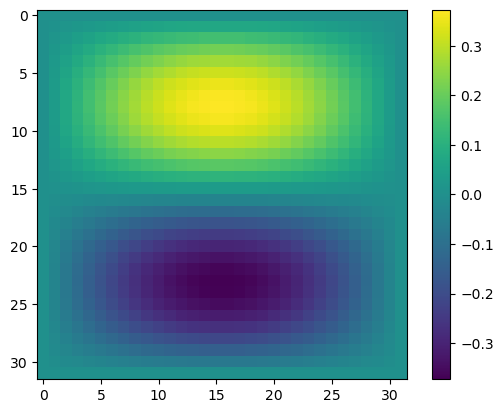

In [6]:
# test av oppgave 3

tol = 1.e-3
t0 = 0
tf = 0.02
h0 = 0.04 # initial step size in vssi
N = 32
k = 32 # k- rank approx

# def grid
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X,Y = np.meshgrid(x,y)

# def exact soln in t0
u_ex_0 = u_exact(X,Y,t0)
u_ex_f = u_exact(X,Y,tf)

#print(u_ex_0)

# Initialize u and u_dot
m,n = N,N
u0 = tilr.u_fun(g,m,n) 
u_dot = tilr.u_dot_fun(g,m,n)

# specify what method to use
method = tilr.second_order_method

# do method
Y,j = vssi.variable_solver(t0,tf,u0,tol,h0,method,k)

Yt = vssi.format_result(u_dot,Y)

plt.imshow(Yt[-1,:,])
plt.colorbar()


# Oppgave 4

In [3]:
t0 = 0
h = 0.1
tol = 1.e-3
k = 20
tf = 1

A = ex.A(0)
A_1 = ex.A(0.0125)
U,s,Vt = np.linalg.svd(A)
S = np.diag(s)
A_f = ex.A(tf)

method = dlr.second_order_method
Y,j = vssi.variable_solver(t0,tf,A,tol,h,method,k)
Yt = vssi.format_result(A,Y)


# Yt er en rank k approx av A og vil dermed ikke være like selv ved t0, men burde kansje være nærmere enn det den er nå

print(np.linalg.norm(Yt[0,:,:]-A)) 
print(np.linalg.norm(Yt[1,:,:] - A_1))
print(np.linalg.norm(Yt[-1,:,:]-A_f))


count 0 j 0 t 0 h 0.1 u 10.0 v 10.0 s 58.033 

count 1 j 0 t 0.0 h 0.05 u 10.0 v 10.0 s 58.033 

count 2 j 0 t 0.0 h 0.025 u 10.0 v 10.0 s 58.033 

count 3 j 0 t 0.0 h 0.0125 u 10.0 v 10.0 s 58.033 

count 0 j 1 t 0.0125 h 0.0125 u 10.0 v 10.0 s 58.404 

count 0 j 2 t 0.025 h 0.0125 u 10.0 v 10.0 s 58.789 

count 0 j 3 t 0.037500000000000006 h 0.0125 u 10.0 v 10.0 s 59.19 

count 0 j 4 t 0.05 h 0.0125 u 10.0 v 10.0 s 59.606 

count 0 j 5 t 0.0625 h 0.0125 u 10.0 v 10.0 s 60.036 

count 0 j 6 t 0.075 h 0.0125 u 10.0 v 10.0 s 60.48 

count 0 j 7 t 0.0875 h 0.0125 u 10.0 v 10.0 s 60.937 

count 0 j 8 t 0.09999999999999999 h 0.0125 u 10.0 v 10.0 s 61.408 

count 0 j 9 t 0.11249999999999999 h 0.0125 u 10.0 v 10.0 s 61.891 

count 0 j 10 t 0.12499999999999999 h 0.0125 u 10.0 v 10.0 s 62.387 

count 0 j 11 t 0.13749999999999998 h 0.0125 u 10.0 v 10.0 s 62.894 

count 0 j 12 t 0.15 h 0.0125 u 10.0 v 10.0 s 63.411 

count 0 j 13 t 0.1625 h 0.0125 u 10.0 v 10.0 s 63.939 

count 0 j 14 t 0.175000

In [4]:
# t0 = 0
# h = 0.1
# tol = 1.e-5
# k = 100
# tf = 0.2

# A0 = ex.A(0.2)
# method = dlr.second_order_method

# Y,j = vssi.variable_solver(t0,tf,A0,tol,h,method,k)
# Yt = vssi.format_result(A0,Y)

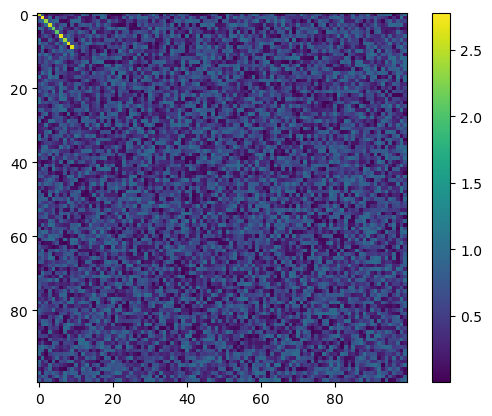

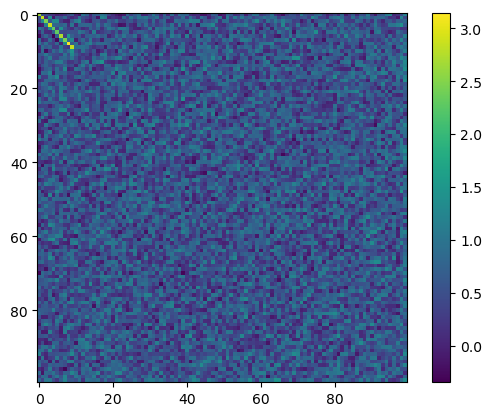

In [9]:
Aend = ex.A(0.2)
plt.imshow(Aend)
plt.colorbar()
plt.show()
plt.imshow(Yt[-1,:,:])
plt.colorbar()
plt.show()

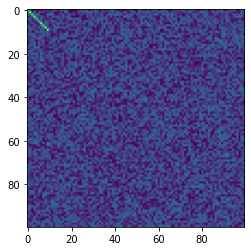

In [10]:
plt.imshow(A_2f)
plt.show()